In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [2]:
# getting the additional sampling data
from imblearn.over_sampling import SMOTE

# Model Validation

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
from sklearn.naive_bayes import MultinomialNB

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv("updated_mobile_data.csv")
data

,rating,cleaned_reviews,category,cleaned_reviews_1,polarity
0,2.0,disappoint overal perform samsung,Negative,"['disappoint', 'overal', 'perform', 'samsung']",0.000000
1,3.0,camera qualiti low,Neutral,"['camera', 'qualiti', 'low']",0.000000
2,4.0,got mobil launch datebatteri must appreciatedc...,Positive,"['get', 'mobil', 'launch', 'datebatteri', 'app...",0.137500
3,1.0,doesnt work ghz wifi frequenc ghz old school c...,Negative,"['work', 'ghz', 'wifi', 'frequenc', 'ghz', 'ol...",0.078788
4,1.0,worth buyingfaulti softwar poor display qualit...,Negative,"['worth', 'buyingfaulti', 'softwar', 'poor', '...",-0.050000
...,...,...,...,...,...
4990,5.0,bit heavi otherwis phone futur great spec dont...,Positive,"['bit', 'heavi', 'otherwis', 'phone', 'futur',...",0.800000
4991,4.0,nice price point,Positive,"['nice', 'price', 'point']",0.600000
4992,4.0,normal use without havi game best phone samsun...,Positive,"['normal', 'use', 'havi', 'game', 'good', 'pho...",0.250000
4993,3.0,good better camera qualiti,Neutral,"['good', 'well', 'camera', 'qualiti']",0.600000


In [8]:
data1=data[['cleaned_reviews','category']]
data1

,cleaned_reviews,category
0,disappoint overal perform samsung,Negative
1,camera qualiti low,Neutral
2,got mobil launch datebatteri must appreciatedc...,Positive
3,doesnt work ghz wifi frequenc ghz old school c...,Negative
4,worth buyingfaulti softwar poor display qualit...,Negative
...,...,...
4990,bit heavi otherwis phone futur great spec dont...,Positive
4991,nice price point,Positive
4992,normal use without havi game best phone samsun...,Positive
4993,good better camera qualiti,Neutral


In [9]:
data1['category'].value_counts()

Positive    2512
Negative    1841
Neutral      642
Name: category, dtype: int64

In [10]:
data1=data1.drop(data1.index[data1['category'] == 'Neutral'])
data1

,cleaned_reviews,category
0,disappoint overal perform samsung,Negative
2,got mobil launch datebatteri must appreciatedc...,Positive
3,doesnt work ghz wifi frequenc ghz old school c...,Negative
4,worth buyingfaulti softwar poor display qualit...,Negative
5,pm,Negative
...,...,...
4989,fast charg phone camera qualiti poor camerasph...,Negative
4990,bit heavi otherwis phone futur great spec dont...,Positive
4991,nice price point,Positive
4992,normal use without havi game best phone samsun...,Positive


In [11]:
data1=data1.reset_index()

In [12]:
data1

,index,cleaned_reviews,category
0,0,disappoint overal perform samsung,Negative
1,2,got mobil launch datebatteri must appreciatedc...,Positive
2,3,doesnt work ghz wifi frequenc ghz old school c...,Negative
3,4,worth buyingfaulti softwar poor display qualit...,Negative
4,5,pm,Negative
...,...,...,...
4348,4989,fast charg phone camera qualiti poor camerasph...,Negative
4349,4990,bit heavi otherwis phone futur great spec dont...,Positive
4350,4991,nice price point,Positive
4351,4992,normal use without havi game best phone samsun...,Positive


In [13]:
data1=data1[['cleaned_reviews','category']]
data1

,cleaned_reviews,category
0,disappoint overal perform samsung,Negative
1,got mobil launch datebatteri must appreciatedc...,Positive
2,doesnt work ghz wifi frequenc ghz old school c...,Negative
3,worth buyingfaulti softwar poor display qualit...,Negative
4,pm,Negative
...,...,...
4348,fast charg phone camera qualiti poor camerasph...,Negative
4349,bit heavi otherwis phone futur great spec dont...,Positive
4350,nice price point,Positive
4351,normal use without havi game best phone samsun...,Positive


In [14]:
def categorical_to_ratings(x):
    if x=='Positive':
        return 1
    else:
        return 0

In [15]:
data1['ratings']=data1['category'].apply(categorical_to_ratings)
data1

,cleaned_reviews,category,ratings
0,disappoint overal perform samsung,Negative,0
1,got mobil launch datebatteri must appreciatedc...,Positive,1
2,doesnt work ghz wifi frequenc ghz old school c...,Negative,0
3,worth buyingfaulti softwar poor display qualit...,Negative,0
4,pm,Negative,0
...,...,...,...
4348,fast charg phone camera qualiti poor camerasph...,Negative,0
4349,bit heavi otherwis phone futur great spec dont...,Positive,1
4350,nice price point,Positive,1
4351,normal use without havi game best phone samsun...,Positive,1


Text(0, 0.5, 'Sentiment Value Count')

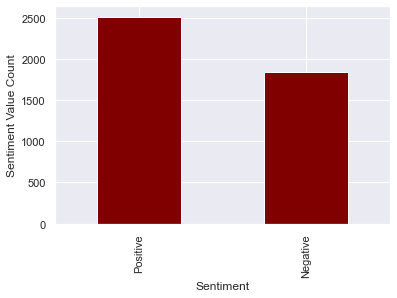

In [16]:
data1['category'].value_counts().plot.bar(color = 'maroon')

plt.xlabel('Sentiment')
plt.ylabel('Sentiment Value Count')

In [17]:
vectorizer = CountVectorizer()
array = vectorizer.fit_transform(data1['cleaned_reviews'].values.astype('U')).toarray()

In [18]:
vectorizer

CountVectorizer()

In [19]:
array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
review_df = pd.DataFrame(array,columns= vectorizer.get_feature_names())
review_df

,aa,aaccessori,aacha,aachi,aag,aanel,aap,aapki,aata,aati,...,youyou,yr,yt,zabardsti,zappi,zeiss,zero,zoom,zoomdec,zoomgoogl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
review_df['category'] =  data1['category']
review_df

,aa,aaccessori,aacha,aachi,aag,aanel,aap,aapki,aata,aati,...,yr,yt,zabardsti,zappi,zeiss,zero,zoom,zoomdec,zoomgoogl,category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
4349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [22]:
review_df.columns

Index(['aa', 'aaccessori', 'aacha', 'aachi', 'aag', 'aanel', 'aap', 'aapki',
       'aata', 'aati',
       ...
       'yr', 'yt', 'zabardsti', 'zappi', 'zeiss', 'zero', 'zoom', 'zoomdec',
       'zoomgoogl', 'category'],
      dtype='object', length=7327)

In [23]:
review_df=review_df.drop_duplicates()
review_df

,aa,aaccessori,aacha,aachi,aag,aanel,aap,aapki,aata,aati,...,yr,yt,zabardsti,zappi,zeiss,zero,zoom,zoomdec,zoomgoogl,category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
4349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive


In [24]:
review_df.shape

(4085, 7327)

In [25]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
review_df['category'] = encode.fit_transform(review_df['category'])

In [26]:
review_df

,aa,aaccessori,aacha,aachi,aag,aanel,aap,aapki,aata,aati,...,yr,yt,zabardsti,zappi,zeiss,zero,zoom,zoomdec,zoomgoogl,category
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
X = review_df.drop(['category'],axis = 1)
y = review_df['category']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7, shuffle=True)

In [30]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
Accuracy=list()

In [31]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    y_pred=clf_model.predict(X_test)
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    resample.append(sampling)
    print(f'Testing Accuracy of Model is = {accuracy_score(y_test,y_pred)} ')
    Accuracy.append(accuracy_score(y_test,y_pred))

## Model-1 Logistic Regression

###### Logistic Regression: with Actual data

In [32]:
log_model=LogisticRegression()
params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

LogisticRegression(C=0.26826957952797276, class_weight='balanced')

In [33]:
test_eval(clf_LR,X_test, y_test, 'Logistic Regression', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       377
           1       0.86      0.88      0.87       440

    accuracy                           0.86       817
   macro avg       0.86      0.85      0.85       817
weighted avg       0.86      0.86      0.86       817
 

Testing Accuracy of Model is = 0.8555691554467564 


###### Logistic Regression with SMOTE analysis

In [ ]:
smote_balance = SMOTE(k_neighbors = 10, sampling_strategy='not majority',random_state= 7)
X_smote, y_smote = smote_balance.fit_resample(X,y)
print(y_smote.value_counts())
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote,y_smote,test_size=0.2, random_state=7, shuffle=True)

In [39]:
log_reg_smote = LogisticRegression()
log_reg_model_smote = log_reg_smote.fit(X_train_smote,y_train_smote)

In [40]:
test_eval(log_reg_model_smote,X_test, y_test, 'Logistic Regression', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       297
           1       0.96      0.90      0.93       514

    accuracy                           0.92       811
   macro avg       0.91      0.92      0.91       811
weighted avg       0.92      0.92      0.92       811
 

Testing Accuracy of Model is = 0.9186189889025894 


###### Logistic Regression with ADASYN analysis

In [41]:
from imblearn.over_sampling import ADASYN
ada_balance = ADASYN(sampling_strategy='not majority',random_state= 7)
X_ada, y_ada = ada_balance.fit_resample(X,y)
print(y_ada.value_counts())
X_train_ada,X_test_ada,y_train_ada,y_test_ada = train_test_split(X_ada,y_ada,test_size=0.2, random_state=7, shuffle=True)
# y_bal.value_counts().plot.pie(autopct = '%0.2f%%')

0    2629
1    2556
Name: category, dtype: int64


In [42]:
log_reg_ada = LogisticRegression()
log_reg_model_ada= log_reg_ada.fit(X_train_ada,y_train_ada)

In [43]:
test_eval(log_reg_model_ada,X_test, y_test, 'Logistic Regression', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       297
           1       0.97      0.89      0.93       514

    accuracy                           0.92       811
   macro avg       0.91      0.92      0.91       811
weighted avg       0.92      0.92      0.92       811
 

Testing Accuracy of Model is = 0.9161528976572133 


## Model-2 Decision Tree

###### Actual data

In [ ]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

In [ ]:
tree_model = DecisionTreeClassifier()
tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}
DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
DT.fit(X_train, y_train)

In [ ]:
test_eval(DT, X_test, y_test, 'Decision Tree', 'actual')

###### Decision Tree with SMOTE

In [ ]:
DT_smote = DecisionTreeClassifier()
DT_smote_model = DT_smote.fit(X_train_smote,y_train_smote)
test_eval(DT_smote,X_test, y_test, 'Decision Tree', 'smote')

###### Decision Tree with ADASYN

In [ ]:
DT_ada = DecisionTreeClassifier()
DT_ada_model = DT_ada.fit(X_train_ada,y_train_ada)
test_eval(DT_ada,X_test, y_test, 'Decision Tree', 'adasyn')

## Model3-Random forest 

In [ ]:
rf_model = RandomForestClassifier()
rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}
RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
RF.fit(X_train, y_train)
# clf_RF.best_estimator_
test_eval(RF, X_test, y_test, 'RandomForest', 'actual')

###### Random Forest with SMOTE analysis

In [ ]:
RF_smote = RandomForestClassifier()
RF_smote_model = RF_smote.fit(X_train_smote,y_train_smote)
test_eval(RF_smote,X_test, y_test, 'RandomForest', 'smote')

###### Random Forest with ADASYN 

In [ ]:
RF_ada = RandomForestClassifier()
RF_ada_model = RF_ada.fit(X_train_ada,y_train_ada)
test_eval(RF_ada,X_test, y_test, 'RandomForest', 'adasyn')

## Model-4 Naive Bayes

In [ ]:
nb = MultinomialNB()
nb_model = nb.fit(X_train,y_train)
test_eval(nb_model,X_test, y_test, 'Naive Bayes', 'actual')

###### Naive Bayes with Smote

In [ ]:
NB_smote = MultinomialNB()
NB_smote_model = NB_smote.fit(X_train_smote,y_train_smote)
test_eval(NB_smote,X_test, y_test, 'Naive Bayes', 'smote')

###### Naive Bayes :ADASYN

In [ ]:
NB_ada = MultinomialNB()
NB_ada_model = NB_ada.fit(X_train_ada,y_train_ada)
test_eval(NB_ada,X_test, y_test, 'Naive Bayes', 'adasyn')

## Model-5 LinearSVC

###### LinearSVC :actual

In [44]:
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc_model=svc.fit(X_train,y_train)
test_eval(svc_model,X_test, y_test, 'Linesr SVC', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       297
           1       0.86      0.91      0.88       514

    accuracy                           0.85       811
   macro avg       0.84      0.83      0.83       811
weighted avg       0.85      0.85      0.85       811
 

Testing Accuracy of Model is = 0.8471023427866831 


###### Linear SVC :smote

In [90]:
SVC_smote = LinearSVC()
SVC_smote_model = SVC_smote.fit(X_train_smote,y_train_smote)
test_eval(SVC_smote_model,X_test, y_test, 'Lines SVC', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       297
           1       0.96      0.93      0.95       514

    accuracy                           0.94       811
   macro avg       0.93      0.94      0.93       811
weighted avg       0.94      0.94      0.94       811
 

Testing Accuracy of Model is = 0.935881627620222 


###### Linear SVC:adasyn

In [91]:
SVC_ada = LinearSVC()
SVC_ada_model = SVC_ada.fit(X_train_ada,y_train_ada)
test_eval(SVC_ada,X_test, y_test, 'Linesr SVC', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       297
           1       0.98      0.93      0.95       514

    accuracy                           0.94       811
   macro avg       0.93      0.94      0.94       811
weighted avg       0.94      0.94      0.94       811
 

Testing Accuracy of Model is = 0.9395807644882861 


In [118]:
import pickle
from pickle import dump
pickle.dump(SVC_ada_model,open('Example2.sav','wb'))

In [119]:
from pickle import load
model_2=pickle.load(open('Example2.sav','rb'))

In [120]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    temp = vec_file.transform([final_review]).toarray()
    return model_2.predict(temp)

In [137]:
import pickle
from pickle import dump
pickle.dump(vectorizer,open('vectorizer.sav','wb'))

In [138]:
from pickle import load
vec_file=pickle.load(open('vectorizer.sav','rb'))

In [142]:
predict_sentiment("Bad products")

array([0])

In [94]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
def predict_sentiment_1(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    temp = vectorizer.transform([final_review]).toarray()
    return SVC_ada_model.predict(temp)

In [127]:
predict_sentiment("This is a budget friendly phone from Samsung")

array([1])

In [128]:
predict_sentiment("Bad Product")

array([0])

In [129]:
review="This is a budget friendly phone from Samsung"
x=predict_sentiment(review)
x1=np.array([1])
if np.array_equal(x,x1):
    print("This is a POSITIVE review.")
else:
    print("This is a NEGATIVE review!")

This is a POSITIVE review.


In [130]:
import pickle
from pickle import dump
pickle.dump(predict_sentiment_1,open('Example1.sav','wb'))

In [131]:
from pickle import load
model_1=pickle.load(open('Example1.sav','rb'))

In [132]:
model_1

<function __main__.predict_sentiment_1(sample_review)>

In [133]:
model_1("Good Fantastic Product")

array([1])

In [134]:
def model(review):
    x=model_1(review)
    x1=np.array([1])
    if np.array_equal(x,x1):
        print("This is a POSITIVE review.")
    else:
        print("This is a NEGATIVE review!")

In [135]:
model("Bad Product")

This is a NEGATIVE review!


In [136]:
model("Vinay is user friendly")

This is a POSITIVE review.


In [113]:
model("This is a budget friendly phone from Samsung")

This is a POSITIVE review.


In [114]:
model("Seems to be a better one in this price segment as of now")

This is a POSITIVE review.


In [82]:
import pickle

In [83]:
from pickle import dump
pickle.dump(model,open('Final_Pickle_data.pkl','wb'))

In [84]:
from pickle import load
sentiment_model=pickle.load(open('Final_Pickle_data.pkl','rb'))

In [85]:
sentiment_model("This is a budget friendly phone from Samsung")
sentiment_model("Camera quality is not good, look like 13mega pixel")
sentiment_model("Seems to be a better one in this price segment as of now")
sentiment_model("Very disappointing ,Samsung manufactured only 2.4Ghz support mobile in 2021 @ 13000 cost")
sentiment_model("The media could not be loaded")

This is a POSITIVE review.
This is a NEGATIVE review!
This is a POSITIVE review.
This is a NEGATIVE review!
This is a NEGATIVE review!


In [ ]:
df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'F1score':F1score,
                            'Accuracy':Accuracy})

In [ ]:
df=pd.DataFrame(df)

In [ ]:
df

In [ ]:
sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df, col="model", height=5)
g.map(sns.barplot, "resample", "Accuracy", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels(' ', fontsize=18)
g.set_ylabels('Recallllllllllllllllll', fontsize=14)

In [ ]:
table = pd.pivot_table(data=df,index=['model','resample'])
table

In [ ]:
Dt_data=df.loc[df['model']=='Decision Tree']
Rt_data=df.loc[df['model']=='RandomForest']
Nb_data=df.loc[df['model']=='Naive Bayes']
Lr_data=df.loc[df['model']=='Logistic Regression']
Sv_data=df.loc[df['model']=='Linesr SVC']

In [ ]:
Rt_data

In [ ]:
Dt_table=pd.pivot_table(data=Dt_data,index=['model','resample'])
Rt_table=pd.pivot_table(data=Rt_data,index=['model','resample'])
Nb_table=pd.pivot_table(data=Nb_data,index=['model','resample'])
Lr_table=pd.pivot_table(data=Lr_data,index=['model','resample'])
Sv_table=pd.pivot_table(data=Sv_data,index=['model','resample'])


In [ ]:
Rt_table

In [ ]:
Dt_table

In [ ]:
Nb_table

In [ ]:
Lr_table

In [ ]:
Sv_table

In [ ]:
Dt_table.plot(kind='barh')
Rt_table.plot(kind='barh')
Nb_table.plot(kind='barh')
Lr_table.plot(kind='barh')
Sv_table.plot(kind='barh')

In [ ]:
sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Linesr SVC'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='RandomForest'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Decision Tree'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Logistic Regression'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Naive Bayes'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

In [ ]:
g = sns.FacetGrid(df.loc[df['model']=='Naive Bayes'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Linesr SVC'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='RandomForest'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Decision Tree'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Logistic Regression'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)